# Demo6: 手寫數字辨識


ref: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py

In [14]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans


### Digital number: 
The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image

In [16]:
a_list = [1, 2, 3, 4, 5, 6]
for item in a_list:
    print(item)

1
2
3
4
5
6


In [17]:
b_list = [ [1, 10],
          [2, 20],
          [3, 30],
          [4, 40]
         ]
for item in b_list:
    print(item)
    

[1, 10]
[2, 20]
[3, 30]
[4, 40]


In [18]:
for m, n in b_list:
    print(m, n)

1 10
2 20
3 30
4 40


In [19]:
c_list = [ [1, 10, 100],
          [2, 20, 200],
          [3, 30, 300],
          [4, 40, 400],
         ]
for item in c_list:
    print(item)
    

[1, 10, 100]
[2, 20, 200]
[3, 30, 300]
[4, 40, 400]


In [22]:
for m, n, k in c_list:
    print(m, n)

1 10
2 20
3 30
4 40


In [23]:
a1 = [1, 2, 3, 4]
a2 = [10, 20, 30, 40]
for m, n in zip(a1, a2):
    print(m, n)

1 10
2 20
3 30
4 40


In [24]:
for item in zip(a1, a2):
    print(item)

(1, 10)
(2, 20)
(3, 30)
(4, 40)


In [ ]:
d_list = []
for i in range(len(axes)):
    d_list.append([ axes[i], digits.images[i], digits.target[i] ])

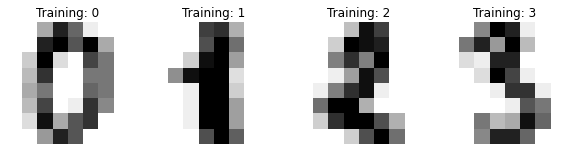

In [25]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [26]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

### 整理資料

In [27]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [28]:
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

In [38]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

### 建立模型

In [29]:
# Create a classifier: a support vector classifier
#clf = svm.SVC(gamma=0.001)

kmeans = KMeans(n_clusters=10)


### 訓練模型

In [32]:
# Learn the digits on the train subset
#clf.fit(X_train, y_train)

kmeans.fit(X_train)


KMeans(n_clusters=10)

In [33]:
y_kmeans = kmeans.predict(X_train)


In [34]:
y_kmeans[:5]

array([3, 2, 2, 8, 7])

In [35]:
y_train[:5]

array([0, 1, 2, 3, 4])

In [37]:
y_kmeans[:5]-y_train[:5]

array([3, 1, 0, 5, 3])

In [13]:
(y_kmeans - y_train)

array([ 6,  1,  0,  6,  0,  4, -1, -4, -6, -8,  6, -1,  5,  6,  0,  3, -1,
       -4, -6,  0,  6, -1,  5,  6, -4,  3, -1, -4, -6,  0,  6,  0,  3,  3,
       -1,  3,  6, -8,  0, -8, -6,  0, -1, -4, -4,  6,  3, -1,  6,  6,  0,
        0, -4, -6,  0,  6, -1,  0, -1,  6,  6, -4,  6,  6,  0, -1, -1, -1,
        0, -7, -1,  3,  6,  0,  3,  0, -6, -2,  6,  6, -1, -4, -1,  6,  5,
       -1, -4,  0, -1,  6, -1,  6,  0,  1, -4, -4, -6,  0,  6,  1,  0,  6,
        3,  5, -1,  0, -1, -1, -4,  3,  0,  0, -4,  5, -6,  0,  0,  3, -4,
       -8,  3,  0, -6, -6,  0,  0,  6, -6, -8, -6,  6, -1,  5,  6,  0,  3,
       -1, -4, -6, -8,  6, -1,  5,  6,  0,  3, -1, -4, -6, -8,  6, -1,  5,
        6,  0,  3, -1, -4, -6, -8,  6,  0,  3,  3, -1,  3,  6, -8, -6, -8,
       -6,  0, -1, -4, -4,  6,  3, -1,  6,  6,  5,  5, -4, -6,  5,  6, -1,
        5, -1,  6,  6, -4,  6,  6,  0, -1, -1, -1, -2, -8, -1,  3,  6,  0,
        3,  1, -6,  5,  6,  6, -1, -4, -1,  6,  5, -1, -4,  6, -1,  6, -8,
       -1, -4, -1, -6,  0

## 用模型做預測

In [13]:
# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

### 簡單做個驗證

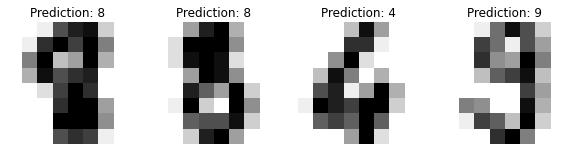

In [14]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

### 評估

In [17]:
print("Classification report for classifier ", clf)
print('------------------------------------')
print(metrics.classification_report(y_test, predicted))

Classification report for classifier  SVC(gamma=0.001)
------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



In [19]:
import sklearn

In [23]:
sklearn.__version__

'0.24.2'